# Naive Bayes

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load direct and inverted indices
import sys
if '..' not in sys.path:
    sys.path.append('..')
from src.utils import LoadIndices, LoadDatasets

from sklearn.model_selection import StratifiedShuffleSplit

In [97]:
# Load datasets
an_jokes, bash_jokes = LoadDatasets()

# Load direct and inverted indices
an_direct, an_inverted, bash_direct, bash_inverted = LoadIndices()

In [65]:
# Vocablary size (number of different words). It will be used for Laplacian smoothing. Calculated for training set
def Vocablary(direct_index, idx):
    vocablary = set()
    for i in idx:
        vocablary |= set(direct_index[i])
    return vocablary

In [66]:
# Random choice of indices for train and test part
# Train and test samples indices
def TrainTestIdx(jokes, train_share = 0.75):
    #N = len(jokes)
    sss = StratifiedShuffleSplit(1, train_size = train_share)
    y = [joke[-1] for joke in jokes]
    return list(sss.split(np.zeros(len(jokes)), y))[0]

In [67]:
# Positive and negative word frequencies (number of use in good or bad jokes)
def word_freq(jokes, direct_index, idx):
    good_wf, bad_wf = {}, {}
    N_good = 0  # Total number of words in good jokes
    N_bad = 0  # Total number of words in bad jokes
    for i in idx:
        joke = direct_index[i]
        is_good = jokes[i][-1]
        if is_good:
            for word in joke:
                #good_wf[word] = good_wf.get(word, 0) + joke[word]
                #N_good += joke[word]
                good_wf[word] = good_wf.get(word, 0) + 1
                N_good += 1
        else:
            for word in joke:
                #bad_wf[word] = bad_wf.get(word, 0) + joke[word]
                #N_bad += joke[word]
                bad_wf[word] = bad_wf.get(word, 0) + 1
                N_bad += 1
    return good_wf, bad_wf, N_good, N_bad

In [68]:
def Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V):
    P_good = 0
    P_bad = 0
    for word in joke:
        # P(word | good)
        P_word_good = (good_freq.get(word, 0) + 1) / (N_words_good + V)
        # P(word | bad)
        P_word_bad = (bad_freq.get(word, 0) + 1) / (N_words_bad + V)
        
        #P_good += joke[word] * np.log(P_word_good)
        #P_bad  += joke[word] * np.log(P_word_bad)
        P_good += np.log(P_word_good)
        P_bad  += np.log(P_word_bad)
    LL = P_good - P_bad
    is_good = float(LL > 0)
    return is_good, LL, P_good, P_bad

## Anecdotes classification

Train set accuracy: 0.767


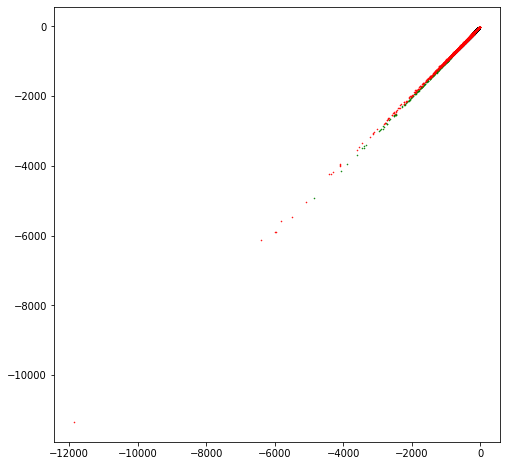

In [98]:
# Indices of jokes in train and test sets
train_idx, test_idx = TrainTestIdx(an_jokes, 0.75)

# Vocablary size
vocab = Vocablary(an_direct, train_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(an_jokes, an_direct, train_idx)

# Classification of train set jokes
accuracy = 0
Pgg, Pgb, Pbg, Pbb = [], [], [], []
for i in train_idx:
    joke = an_direct[i]
    is_good = an_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
    if is_good:
        Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
        Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
    else:
        Pbg.append(P_good)  # Probability of bad joke to be good according to NB
        Pbb.append(P_bad)  # Probability of bad jokes to be bad according to NB

accuracy /= len(train_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [99]:
# Test set accuracy
accuracy = 0
LLg, LLb = {}, {}
for i in test_idx:
    joke = an_direct[i]
    is_good = an_jokes[i][-1]
    is_good_nb, LLg[i], P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
accuracy /= len(test_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.609


## Bash quotes classification

Train set accuracy: 0.886


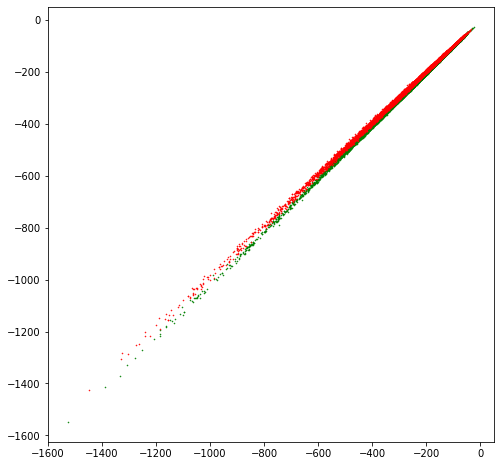

In [100]:
# Indices of jokes in train and test sets
train_idx, test_idx = TrainTestIdx(bash_jokes)

# Vocablary size
vocab = Vocablary(bash_direct, train_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(bash_jokes, bash_direct, train_idx)

# Classification of train set jokes
accuracy = 0
Pgg, Pgb, Pbg, Pbb = [], [], [], []
for i in train_idx:
    joke = bash_direct[i]
    is_good = bash_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
    if is_good:
        Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
        Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
    else:
        Pbg.append(P_good)  # Probability of bad joke to be good according to NB
        Pbb.append(P_bad)   # Probability of bad jokes to be bad according to NB
accuracy /= len(train_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [101]:
# Test set accuracy
accuracy = 0
for i in test_idx:
    joke = bash_direct[i]
    is_good = bash_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
accuracy /= len(test_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.636
